In [1]:
# เรียกใช้ library สำหรับทำงานประกอบด้วย numpy pandas seaborn เเละ matplotlib
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam

Using TensorFlow backend.
C:\Users\Anwa\Downloads\machine\Newfolder\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Anwa\Downloads\machine\Newfolder\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Anwa\Downloads\machine\Newfolder\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Anwa\Downloads\machi

In [2]:
# อ่านข้อมูลไฟล์ csv จาก https://raw.githubusercontent.com/nawinpoyen7/MachineLearning/main/DataSet/DataChange.csv
# และเเสดง 5 ตัวอย่างเเรก เพื่อตรวจสอบข้อมูล
url='https://raw.githubusercontent.com/nawinpoyen7/MachineLearning/main/DataSet/CombDataSet.csv'
dataset=pd.read_csv(url)
dataset.head(5)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,0.015047,0.000000,0.005260,0.000000,0.003284,0.002718,0.000000,0.012819,0.007649,D
1,0.000000,0.014676,0.009085,0.014188,0.009852,0.002718,0.012093,0.009614,0.007649,A
2,0.000000,0.014676,0.016018,0.014188,0.009852,0.002718,0.000000,0.003205,0.012749,B
3,0.015047,0.014676,0.016018,0.014188,0.016421,0.000000,0.024186,0.006410,0.012749,B
4,0.000000,0.014676,0.009563,0.014188,0.006568,0.002718,0.024186,0.019229,0.012749,A


In [3]:
dataset.Segmentation.value_counts()

D    2268
A    1972
C    1970
B    1858
Name: Segmentation, dtype: int64

In [4]:
dataset.columns

Index(['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

In [5]:
#Vals=['Gender','Ever_Married','Age','Graduated','Profession','Work_Experience','Spending_Score','Family_Size','Var_1']
#sns.pairplot(data=dataset,hue='Segmentation');

In [6]:
from sklearn.preprocessing import StandardScaler # ปรับช่วงข้อมูลด้วยวิธี standardization
from sklearn.preprocessing import OneHotEncoder
 # กำหนดตัวเเปร X เพื่อเก็บข้อมูลดอกไอริสสำหรับ features ที่ต้องการ 
Vals=['Profession', 'Spending_Score', 'Age', 'Graduated']
X=dataset[Vals] 
# สร้าง object ชื่อ scaler จาก class ของ StandardScaler เพื่อใช้สำหรับการเรียกใช้ในการปรับช่วงข้อมูล
scaler = StandardScaler()  
# ปรับช่วงข้อมูลเเละเก็บอยู่ในตัวเเปร X_scale ซึ่งข้อมูลจะอยู่ในรูปของ numpy array
X_scale=scaler.fit_transform(X)  
# ปรับให้เเสดงด้วยตัวเลขทศนิยม 4 ตำเเหน่ง 
X_scale = X_scale.round(4) 
y = np.array(dataset['Segmentation'])

encoder = OneHotEncoder()
y_targets = encoder.fit_transform(dataset[['Segmentation']]).toarray()

In [7]:
from sklearn.model_selection import train_test_split
test_size=0.003    #เปลี่ยนจาก 0.3 เป็น  0.01      (1%)     ได้ 0.79  -  0.806
                    #                 0.001    (0.1%)    ได้ 0.8   -  0.833   
                    #                 0.002    (0.2%)    ได้ 0.824 -  0.838   
                    #                 0.003    (0.3%)    ได้ 0.82  -  0.85    test ประมาณ 24 ตัวจาก 8068ตัว ที่เหลือ train (เท่าที่ลองมาตามค่าที่ระบุ ค่านี้ดีสุด)
                    #                 0.004    (0.4%)    ได้ 0.788 -  0.811
                    #                 0.005    (0.5%)    ได้ 0.793 -  0.811
                    #                 0.006    (0.6%)    ได้ 0.796 -  0.816
                    #                 0.007    (0.7%)    ได้ 0.798 -  
                    #                 0.008    (0.8%)    ได้ 0.8   -  
                    #                 0.009    (0.9%)    ได้ 0.771
                    #                 0.0001   (0.01%)   ได้ 0.75
        
X_train, X_test, y_train, y_test = train_test_split(
    X, y_targets, 
    test_size=test_size, random_state=7)

In [8]:
model = Sequential()

#Ns = (1-test_size)*number of samples = (1-0.3)8068
#Nh = Ns / ( alfa( Ni + No ) ) # alfa=2 ; (1-0.3)8068 / 2(4+4) = 352.975 = 353
#alfa   Acc(0-1)    Nh
#10     0.784       71    
#9      0.783       79
#8      0.784       89
#7      0.787      101
#6      0.785      118
#5      0.786      142
#4      0.783      177
#3      0.785      236
#2      0.784      353

#Weight Initialization Techniques
in1='he_normal'
init='glorot_uniform'

# number of hidden layer = 4  
# สร้าง hidden layer ที่ 1 ประกอบด้วย 100 โหนด ซึ่งเชื่อมต่อกับ Input layer ประกอบด้วย 4 โหนด 
# เเละเลือกใช้ ReLu เป็น activation function
model.add(Dense(100, input_dim=4, activation='relu'))

# สร้าง hidden layer ที่ 2 ประกอบด้วย 100 โหนด ซึ่งเชื่อมต่อกับ hidden layer ที่ 1 ประกอบด้วย 100 โหนด 
# เเละเลือกใช้ ReLu เป็น activation function 
model.add(Dense(100, input_dim=100, activation='relu'))#, kernel_initializer=in1))

# สร้าง hidden layer ที่ 3 ประกอบด้วย 100 โหนด ซึ่งเชื่อมต่อกับ hidden layer ที่ 2 ประกอบด้วย 100 โหนด 
# เเละเลือกใช้ ReLu เป็น activation function
model.add(Dense(100, input_dim=100, activation='relu'))#, kernel_initializer=in1))

# สร้าง hidden layer ที่ 4 ประกอบด้วย 100โหนด ซึ่งเชื่อมต่อกับ hidden layer ที่ 3 ประกอบด้วย 100 โหนด 
# เเละเลือกใช้ ReLu เป็น activation function
model.add(Dense(100, input_dim=100, activation='relu'))#, kernel_initializer=in1))

# สร้าง output layer ประกอบด้วย 4 โหนด ซึ่งเชื่อมต่อกับ hidden layer ที่ 4 ประกอบด้วย 100 โหนด 
# เเละเลือกใช้ sigmoid เป็น activation function 
model.add(Dense(4, activation='sigmoid'))#, kernel_initializer=init))

In [9]:
# ทดลองเเสดงค่า weight ของเเต่ละ layer ซึ่งค่าที่เเสดงเป็นค่าที่ถูกสุ่มขึ้นสำหรับการปรับค่า weight ในเเต่ละ layer ต่อไป
print(model.weights)

[<tf.Variable 'dense_1/kernel:0' shape=(4, 100) dtype=float32>, <tf.Variable 'dense_1/bias:0' shape=(100,) dtype=float32>, <tf.Variable 'dense_2/kernel:0' shape=(100, 100) dtype=float32>, <tf.Variable 'dense_2/bias:0' shape=(100,) dtype=float32>, <tf.Variable 'dense_3/kernel:0' shape=(100, 100) dtype=float32>, <tf.Variable 'dense_3/bias:0' shape=(100,) dtype=float32>, <tf.Variable 'dense_4/kernel:0' shape=(100, 100) dtype=float32>, <tf.Variable 'dense_4/bias:0' shape=(100,) dtype=float32>, <tf.Variable 'dense_5/kernel:0' shape=(100, 4) dtype=float32>, <tf.Variable 'dense_5/bias:0' shape=(4,) dtype=float32>]


In [10]:
# กำหนดให้ optimizer ใช้ method adam ในการปรับปรุงค่าด้วย learning rate = 0.000001 ถึง 1
#LR          ACC     
#0.000001    0.786    
#0.00001     0.787
#0.0001      0.789
#0.001       0.788
#0.01        0.785
#0.1         0.785
#1           0.784

#optimizer = Adam(learning_rate=0.0001)#, decay=1)
model.compile(loss='binary_crossentropy', # เปลี่ยนจาก loss='mean_squared_error' เป็น loss='binary_crossentropy'
              optimizer='adam',
              metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [11]:
# แยกข้อมูลเทรนส่วนหนึ่งออกมาเป็น Validation set เพื่อให้ Optimiser ทดสอบความแม่นยำทุกๆ Epoch
# batch_size ยิ่งน้อยยิ่งทำงานละเอียด แต่ใช้เวลาประมวลผลนาน
model.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=1) #, batch_size=1)


Train on 6434 samples, validate on 1609 samples
Epoch 1/100
6434/6434 [==============================] - 6s 920us/step - loss: 0.5738 - accuracy: 0.7486 - val_loss: 0.5612 - val_accuracy: 0.7500
Epoch 2/100
6434/6434 [==============================] - 4s 546us/step - loss: 0.5565 - accuracy: 0.7500 - val_loss: 0.5257 - val_accuracy: 0.7500
Epoch 3/100
6434/6434 [==============================] - 2s 301us/step - loss: 0.5108 - accuracy: 0.7624 - val_loss: 0.5203 - val_accuracy: 0.7544
Epoch 4/100
6434/6434 [==============================] - 2s 249us/step - loss: 0.5070 - accuracy: 0.7660 - val_loss: 0.5028 - val_accuracy: 0.7596
Epoch 5/100
6434/6434 [==============================] - 2s 270us/step - loss: 0.5031 - accuracy: 0.7693 - val_loss: 0.5006 - val_accuracy: 0.7665
Epoch 6/100
6434/6434 [==============================] - 2s 263us/step - loss: 0.5031 - accuracy: 0.7683 - val_loss: 0.4997 - val_accuracy: 0.7680
Epoch 7/100
6434/6434 [==============================] - 2s 289us/ste

In [12]:
results = model.evaluate(X_test, y_test)
print('Accuracy: %.3f' % results[1])

25/25 [==============================] - 0s 120us/step
Accuracy: 0.850


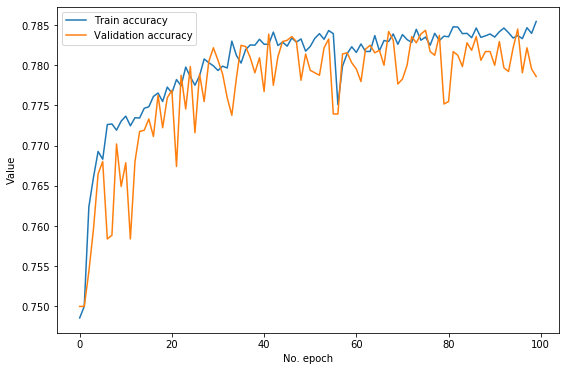

In [13]:
# Review model's progress
# เปรียบเทียบข้อมูลจากการเทรนกับข้อมูลจาก Validation set
plt.figure(figsize=(9,6))
plt.plot(model.history.history['accuracy'], label='Train accuracy')
plt.plot(model.history.history['val_accuracy'], label='Validation accuracy')
plt.ylabel('Value')
plt.xlabel('No. epoch')
plt.legend()
plt.show()

In [14]:
# Evaluate model's accuracy
# ทดสอบความแม่นยำของโมเดล กับ Test set ซึ่งแยกไว้ตั้งแต่แรกอีกที
# ทดสอบโมเดลที่ปรับแต่งเสร็จแล้ว กับ Test set อีกที เพื่อให้ได้ผลที่เที่ยงธรรม
score = model.evaluate(X_test, y_test, verbose=0)
print("Loss is", score[0])
print("Accuracy score is", score[1])

Loss is 0.34778228402137756
Accuracy score is 0.8500000238418579


In [15]:
# ใช้ dropout regularization
#from tensorflow.keras.layers import Dropout

In [16]:
#model = Sequential()

#Ns = (1-test_size)*number of samples = (1-0.3)8068
#Nh = Ns / ( alfa( Ni + No ) ) # alfa=2 ; (1-0.3)8068 / 2(4+4) = 352.975 = 353
# alfa   Acc(0-1)    Nh
# 10     0.784       71    
# 9      0.783       79
# 8      0.784       89
# 7      0.787      101
# 6      0.785      118
# 5      0.786      142
# 4      0.783      177
# 3      0.785      236
# 2      0.784      353

# number of hidden layer = 4  

# สร้าง hidden layer ที่ 1 ประกอบด้วย 100 โหนด ซึ่งเชื่อมต่อกับ Input layer ประกอบด้วย 4 โหนด 
# เเละเลือกใช้ ReLu เป็น activation function
#model.Dropout=0.75
#model.add(Dense(100, input_dim=4, activation='relu'))

# สร้าง hidden layer ที่ 2 ประกอบด้วย 100 โหนด ซึ่งเชื่อมต่อกับ hidden layer ที่ 1 ประกอบด้วย 100 โหนด 
# เเละเลือกใช้ ReLu เป็น activation function 
model.add(Dense(100, input_dim=100, activation='relu'))#,Dropout(0.3)

# สร้าง hidden layer ที่ 3 ประกอบด้วย 100 โหนด ซึ่งเชื่อมต่อกับ hidden layer ที่ 2 ประกอบด้วย 100 โหนด 
# เเละเลือกใช้ ReLu เป็น activation function
#model.add(Dense(100, input_dim=100, activation='relu'))#,Dropout(0.3)

# สร้าง hidden layer ที่ 4 ประกอบด้วย 100โหนด ซึ่งเชื่อมต่อกับ hidden layer ที่ 3 ประกอบด้วย 100 โหนด 
# เเละเลือกใช้ ReLu เป็น activation function
#model.add(Dense(100, input_dim=100, activation='relu'))#,Dropout(0.3)

# สร้าง output layer ประกอบด้วย 4 โหนด ซึ่งเชื่อมต่อกับ hidden layer ที่ 4 ประกอบด้วย 100 โหนด 
# เเละเลือกใช้ sigmoid เป็น activation function 
#model.add(Dense(4, activation='sigmoid'))

In [22]:
# กำหนดให้ optimizer ใช้ method adam ในการปรับปรุงค่าด้วย learning rate = 1-0.000001
# optimizer = Adam(learning_rate=0.0001)
#model.compile(loss='binary_crossentropy', # เปลี่ยนจาก loss='mean_squared_error' เป็น loss='binary_crossentropy'
#             optimizer='adam',
#            metrics=['accuracy'])

In [23]:
#model.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=1)

In [24]:
#results = model.evaluate(X_test, y_test)
#print('Accuracy: %.3f' % results[1])

In [25]:
# Review model's progress
#plt.figure(figsize=(9,6))
#plt.plot(model.history.history['accuracy'], label='Train accuracy')
#plt.plot(model.history.history['val_accuracy'], label='Validation accuracy')
#plt.ylabel('Value')
#plt.xlabel('No. epoch')
#plt.legend()
#plt.show()

In [26]:
# Evaluate model's accuracy
#score = model.evaluate(X_test, y_test, verbose=0)
#print("Loss is", score[0])
#print("Accuracy score is", score[1])